# Configuring pandas

In [2]:
# import numpy and pandas
import numpy as np
import pandas as pd

# used for dates
import datetime
from datetime import datetime, date

# Set formattign options
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 7)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 60)

# bring in matplotlib for graphics
import matplotlib.pyplot as plt
%matplotlib inline

# read in the data and print the first five rows
# use the Symbol column as the index, and 
# only read in columns in positions 0, 2, 3, 7
sp500 = pd.read_csv("data/sp500.csv", 
                    index_col='Symbol', 
                    usecols=[0, 2, 3, 7])

# one month of stock history data
omh = pd.read_csv("data/omh.csv")

# Performing arithmetic on a DataFrame or Series

In [3]:
# set the seed to allow replicatable results
np.random.seed(123456)
# create the DataFrame
df = pd.DataFrame(np.random.randn(5, 4), 
                  columns=['A', 'B', 'C', 'D'])
df

          A         B         C         D
0  0.469112 -0.282863 -1.509059 -1.135632
1  1.212112 -0.173215  0.119209 -1.044236
2 -0.861849 -2.104569 -0.494929  1.071804
3  0.721555 -0.706771 -1.039575  0.271860
4 -0.424972  0.567020  0.276232 -1.087401

In [4]:
# multiply everything by 2
df * 2

          A         B         C         D
0  0.938225 -0.565727 -3.018117 -2.271265
1  2.424224 -0.346429  0.238417 -2.088472
2 -1.723698 -4.209138 -0.989859  2.143608
3  1.443110 -1.413542 -2.079150  0.543720
4 -0.849945  1.134041  0.552464 -2.174801

In [5]:
# get first row 
s = df.iloc[0] 
# subtract first row from every row of the DataFrame
diff = df - s 
diff

          A         B         C         D
0  0.000000  0.000000  0.000000  0.000000
1  0.743000  0.109649  1.628267  0.091396
2 -1.330961 -1.821706  1.014129  2.207436
3  0.252443 -0.423908  0.469484  1.407492
4 -0.894085  0.849884  1.785291  0.048232

In [6]:
# subtract DataFrame from Series
diff2 = s - df
diff2

          A         B         C         D
0  0.000000  0.000000  0.000000  0.000000
1 -0.743000 -0.109649 -1.628267 -0.091396
2  1.330961  1.821706 -1.014129 -2.207436
3 -0.252443  0.423908 -0.469484 -1.407492
4  0.894085 -0.849884 -1.785291 -0.048232

In [7]:
# B, C
s2 = s[1:3]
# add E
s2['E'] = 0
# see how alignment is applied in math
df + s2

    A         B         C   D   E
0 NaN -0.565727 -3.018117 NaN NaN
1 NaN -0.456078 -1.389850 NaN NaN
2 NaN -2.387433 -2.003988 NaN NaN
3 NaN -0.989634 -2.548633 NaN NaN
4 NaN  0.284157 -1.232826 NaN NaN

In [8]:
# get rows 1 through three, and only B, C columns
subframe = df[1:4][['B', 'C']]
# we have extracted a little square in the middle of df
subframe

          B         C
1 -0.173215  0.119209
2 -2.104569 -0.494929
3 -0.706771 -1.039575

In [9]:
# demonstrate the alignment of the subtraction
df - subframe

    A    B    C   D
0 NaN  NaN  NaN NaN
1 NaN  0.0  0.0 NaN
2 NaN  0.0  0.0 NaN
3 NaN  0.0  0.0 NaN
4 NaN  NaN  NaN NaN

In [10]:
# get the A column
a_col = df['A']
df.sub(a_col, axis=0)

     A         B         C         D
0  0.0 -0.751976 -1.978171 -1.604745
1  0.0 -1.385327 -1.092903 -2.256348
2  0.0 -1.242720  0.366920  1.933653
3  0.0 -1.428326 -1.761130 -0.449695
4  0.0  0.991993  0.701204 -0.662428

# Counts of values

In [11]:
s = pd.Series(['a', 'a', 'b', 'c', np.NaN])
# number of occurrences of each unique value
s.count()

4

# Unique and number of unique values

In [12]:
# return a list of unique items
s.unique()

array(['a', 'b', 'c', nan], dtype=object)

In [13]:
s.nunique()

3

In [14]:
s.nunique(dropna=False)

4

In [15]:
# get summary stats on non-numeric data
s.value_counts(dropna=False)

a      2
c      1
b      1
NaN    1
dtype: int64

# Minimum and maximums

In [16]:
# location of min price for both stocks
omh[['MSFT', 'AAPL']].min()

MSFT     45.16
AAPL    106.75
dtype: float64

In [17]:
# and location of the max
omh[['MSFT', 'AAPL']].max()

MSFT     48.84
AAPL    115.93
dtype: float64

In [18]:
# location of min price for both stocks
omh[['MSFT', 'AAPL']].idxmin()

MSFT    11
AAPL    11
dtype: int64

In [19]:
# and location of the max
omh[['MSFT', 'AAPL']].idxmax()

MSFT    3
AAPL    2
dtype: int64

# Smallest and Largest Values

In [20]:
# get the 4 smallest values
omh.nsmallest(4, ['MSFT'])['MSFT']

11    45.16
12    45.74
21    46.45
10    46.67
Name: MSFT, dtype: float64

In [21]:
# get the 4 largest values
omh.nlargest(4, ['MSFT'])['MSFT']

3     48.84
0     48.62
1     48.46
16    48.45
Name: MSFT, dtype: float64

In [22]:
# nsmallest on a Series
omh.MSFT.nsmallest(4)

11    45.16
12    45.74
21    46.45
10    46.67
Name: MSFT, dtype: float64

# Accumulations

In [23]:
# calculate a cumulative product
pd.Series([1, 2, 3, 4]).cumprod()

0     1
1     2
2     6
3    24
dtype: int64

In [24]:
# calculate a cumulative sum
pd.Series([1, 2, 3, 4]).cumsum()

0     1
1     3
2     6
3    10
dtype: int64

# Summary descriptive statistics

In [25]:
# get summary statistics for the stock data
omh.describe()

            MSFT        AAPL
count  22.000000   22.000000
mean   47.493182  112.411364
std     0.933077    2.388772
min    45.160000  106.750000
25%    46.967500  111.660000
50%    47.625000  112.530000
75%    48.125000  114.087500
max    48.840000  115.930000

In [26]:
# just the stats for MSFT
omh.MSFT.describe()

count    22.000000
mean     47.493182
std       0.933077
min      45.160000
25%      46.967500
50%      47.625000
75%      48.125000
max      48.840000
Name: MSFT, dtype: float64

In [27]:
# only the mean for MSFT
omh.MSFT.describe()['mean']

47.493181818181824

In [28]:
# get summary stats on non-numeric data
s = pd.Series(['a', 'a', 'b', 'c', np.NaN])
s.describe()

count     4
unique    3
top       a
freq      2
dtype: object

# Mean

In [29]:
# the mean of all the columns in omh
omh.mean()

MSFT     47.493182
AAPL    112.411364
dtype: float64

In [30]:
# calc the mean of the values in each row
omh.mean(axis=1)[:5]

0    81.845
1    81.545
2    82.005
3    82.165
4    81.710
dtype: float64

# Median

In [31]:
# calc the median of the values in each column
omh.median()

MSFT     47.625
AAPL    112.530
dtype: float64

# Mode

In [32]:
# find the mode of this Series
s = pd.Series([1, 2, 3, 3, 5])
s.mode()

0    3
dtype: int64

In [33]:
# there can be more than one mode
s = pd.Series([1, 2, 3, 3, 5, 1])
s.mode()

0    1
1    3
dtype: int64

# Variance

In [34]:
# calc the variance of the values in each column
omh.var()

MSFT    0.870632
AAPL    5.706231
dtype: float64

# Standard Deviation

In [35]:
# standard deviation
omh.std()

MSFT    0.933077
AAPL    2.388772
dtype: float64

# Covariance

In [36]:
# covariance of MSFT vs AAPL
omh.MSFT.cov(omh.AAPL)

1.9261240259740264

# Correlation

In [37]:
# correlation of MSFT relative to AAPL
omh.MSFT.corr(omh.AAPL)

0.8641560684381171

# Discretization and quantiling

In [38]:
# generate 10000 normal random #'s
np.random.seed(123456)
dist = np.random.normal(size = 10000)
dist

array([ 0.4691123 , -0.28286334, -1.5090585 , ...,  0.26296448,
       -0.83377412, -0.10418135])

In [39]:
# show the mean and std
(dist.mean(), dist.std())

(-0.002863324040906651, 1.008716203199891)

In [40]:
# cut into 5 equally sized bins
bins = pd.cut(dist, 5)
bins

[(-0.633, 0.81], (-0.633, 0.81], (-2.077, -0.633], (-2.077, -0.633], (0.81, 2.254], ..., (-2.077, -0.633], (-0.633, 0.81], (-0.633, 0.81], (-2.077, -0.633], (-0.633, 0.81]]
Length: 10000
Categories (5, interval[float64]): [(-3.528, -2.077] < (-2.077, -0.633] < (-0.633, 0.81] < (0.81, 2.254] < (2.254, 3.698]]

In [41]:
# just the categories 
bins.categories

IntervalIndex([(-3.528, -2.077], (-2.077, -0.633], (-0.633, 0.81], (0.81, 2.254], (2.254, 3.698]],
              closed='right',
              dtype='interval[float64]')

In [42]:
# codes tells us which bin each item is in
bins.codes

array([2, 2, 1, ..., 2, 1, 2], dtype=int8)

In [43]:
# move the closed side of the interval to the left
pd.cut(dist, 5, right=False).categories

IntervalIndex([[-3.521, -2.077), [-2.077, -0.633), [-0.633, 0.81), [0.81, 2.254), [2.254, 3.705)],
              closed='left',
              dtype='interval[float64]')

In [44]:
# generate 50 ages between 6 and 45
np.random.seed(123456)
ages = np.random.randint(6, 45, 50)
ages

array([ 7, 33, 38, 29, 42, 14, 16, 16, 18, 17, 26, 28, 44, 40, 20, 12,  8,
       10, 36, 29, 26, 26, 11, 29, 42, 17, 41, 35, 22, 40, 24, 21, 38, 33,
       26, 23, 16, 34, 26, 20, 18, 42, 27, 13, 37, 37, 10,  7, 10, 23])

In [45]:
# cut into ranges and then get descriptive stats
ranges = [6, 12, 18, 35, 50]
agebins = pd.cut(ages, ranges)
agebins.describe()

            counts  freqs
categories               
(6, 12]          8   0.16
(12, 18]         9   0.18
(18, 35]        21   0.42
(35, 50]        12   0.24

In [46]:
# add names for the bins
ranges = [6, 12, 18, 35, 50]
labels = ['Youth', 'Young Adult', 'Adult', 'Middle Aged']
agebins = pd.cut(ages, ranges, labels=labels)
agebins.describe()

             counts  freqs
categories                
Youth             8   0.16
Young Adult       9   0.18
Adult            21   0.42
Middle Aged      12   0.24

In [47]:
# cut into quantiles
# 5 bins with an equal quantity of items
qbin = pd.qcut(dist, 5)
# this will tell us the range of values in each quantile
qbin.describe()

                  counts  freqs
categories                     
(-3.522, -0.861]    2000    0.2
(-0.861, -0.241]    2000    0.2
(-0.241, 0.261]     2000    0.2
(0.261, 0.866]      2000    0.2
(0.866, 3.698]      2000    0.2

In [48]:
# make the quantiles at the +/- 3, 2 and 1 std deviations
quantiles = [0,
             0.001, 
             0.021,
             0.5-0.341,
             0.5,
             0.5+0.341,
             1.0-0.021,
             1.0-0.001,
             1.0]
qbin = pd.qcut(dist, quantiles)
# this data should be a perfect normal distribution
qbin.describe()

                    counts  freqs
categories                       
(-3.522, -3.131]        10  0.001
(-3.131, -2.056]       200  0.020
(-2.056, -1.033]      1380  0.138
(-1.033, -0.00363]    3410  0.341
(-0.00363, 1.011]     3410  0.341
(1.011, 2.043]        1380  0.138
(2.043, 3.062]         200  0.020
(3.062, 3.698]          10  0.001

# Ranking

In [49]:
# random data
np.random.seed(12345)
s = pd.Series(np.random.np.random.randn(5), index=list('abcde'))
s

a   -0.204708
b    0.478943
c   -0.519439
d   -0.555730
e    1.965781
dtype: float64

In [50]:
# rank the values
s.rank()

a    3.0
b    4.0
c    2.0
d    1.0
e    5.0
dtype: float64

# Percent change

In [51]:
# calculate % change on MSFT
omh[['MSFT']].pct_change()[:5]

       MSFT
0       NaN
1 -0.003291
2 -0.007842
3  0.015807
4 -0.008600

# Moving window operations

In [52]:
# create a random walk
np.random.seed(123456)
s = pd.Series(np.random.randn(1000)).cumsum()
s[:5]

0    0.469112
1    0.186249
2   -1.322810
3   -2.458442
4   -1.246330
dtype: float64

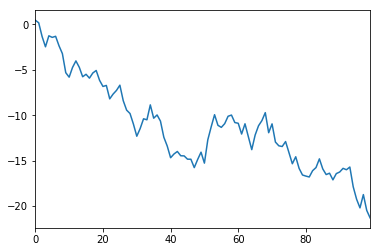

In [53]:
s[0:100].plot();

In [54]:
# calculate rolling window of three days
r = s.rolling(window=3)
r

Rolling [window=3,center=False,axis=0]

In [55]:
# the rolling mean at three days
means = r.mean()
means[:7]

0         NaN
1         NaN
2   -0.222483
3   -1.198334
4   -1.675860
5   -1.708105
6   -1.322070
dtype: float64

In [56]:
# check the mean of the first 3 numbers
s[0:3].mean()

-0.22248276403642672

In [57]:
# mean of 1 through 3
s[1:4].mean()

-1.1983341702095498

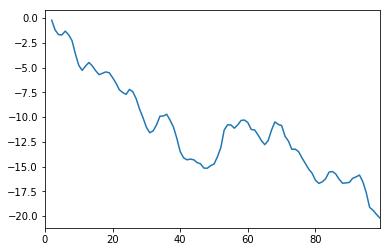

In [58]:
# plot the 3 day rolling mean
means[0:100].plot();

# Random sampling

In [59]:
# create a random sample of four columns of 50 items
np.random.seed(123456)
df = pd.DataFrame(np.random.randn(50, 4))
df[:5]

          0         1         2         3
0  0.469112 -0.282863 -1.509059 -1.135632
1  1.212112 -0.173215  0.119209 -1.044236
2 -0.861849 -2.104569 -0.494929  1.071804
3  0.721555 -0.706771 -1.039575  0.271860
4 -0.424972  0.567020  0.276232 -1.087401

In [60]:
# sample three random rows
df.sample(n=3)

           0         1         2         3
15 -0.076467 -1.187678  1.130127 -1.436737
28 -2.182937  0.380396  0.084844  0.432390
48 -0.693921  1.613616  0.464000  0.227371

In [61]:
# sample 10% of the rows
df.sample(frac=0.1)

           0         1         2         3
37  1.126203 -0.977349  1.474071 -0.064034
10 -1.294524  0.413738  0.276662 -0.472035
4  -0.424972  0.567020  0.276232 -1.087401
14  0.410835  0.813850  0.132003 -0.827317
48 -0.693921  1.613616  0.464000  0.227371

In [62]:
# 10% with replacement
df.sample(frac=0.1, replace=True)

           0         1         2         3
27 -1.236269  0.896171 -0.487602 -0.082240
9   0.357021 -0.674600 -1.776904 -0.968914
27 -1.236269  0.896171 -0.487602 -0.082240
15 -0.076467 -1.187678  1.130127 -1.436737
9   0.357021 -0.674600 -1.776904 -0.968914